In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

submission_path = 'input/submission.csv'
test_path = 'input/test.csv'
train_path = 'input/train.csv'

# Data Loading

In [3]:
data_train = pd.read_csv(train_path)

1) Посмотрите на случайные строчки.

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
data_train.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2080,1,71.65,71.65,Male,0,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2192,23,95.30,2192.9,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Mailed check,0
1486,8,74.85,572.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
2359,48,20.00,935.9,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1484,16,19.60,314.45,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4298,60,25.00,1505.05,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3519,72,90.80,6397.6,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4319,2,20.30,40.25,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2507,52,93.25,4631.7,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2937,66,102.40,6471.85,Female,1,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0


In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
data_train.isnull().sum()

ClientPeriod 0
MonthlySpending 0
TotalSpent 0
Sex 0
IsSeniorCitizen 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0
Churn 0
dtype: int64

NaN'ов не обнаружено.

In [8]:
(data_train == ' ').sum()

ClientPeriod 0
MonthlySpending 0
TotalSpent 9
Sex 0
IsSeniorCitizen 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0
Churn 0
dtype: int64

Однако в столбце TotalSpent есть пробелы. Заменим их на среднее арифметическое:

In [9]:
data_train["TotalSpent"] = data_train["TotalSpent"].apply(pd.to_numeric,errors='coerce')
data_train["TotalSpent"] = data_train["TotalSpent"].astype('float64')
data_train['TotalSpent'].fillna(value=data_train['TotalSpent'].mean(), inplace=True)

(data_train == ' ').sum()

ClientPeriod 0
MonthlySpending 0
TotalSpent 0
Sex 0
IsSeniorCitizen 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0
Churn 0
dtype: int64

# Data Analysis

Изучим числовые признаки:

In [10]:
data_train[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


1) Для численных признаков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). 

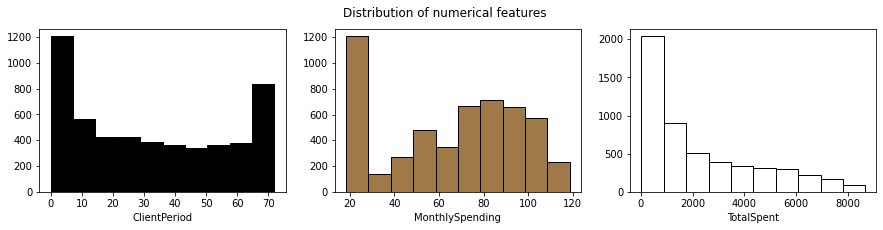

In [11]:
def get_cmap(n, name='cubehelix'): #цветовая тема
    return plt.cm.get_cmap(name, n)

colors = get_cmap(3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
fig.suptitle('Distribution of numerical features')


for index, axis in enumerate(axes):
    axis.hist(data_train[num_cols[index]], color = colors(index), ec="black")
    axis.set_xlabel(num_cols[index])

Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, если вы сможете это сделать на одном графике с помощью plt.subplots(...)).

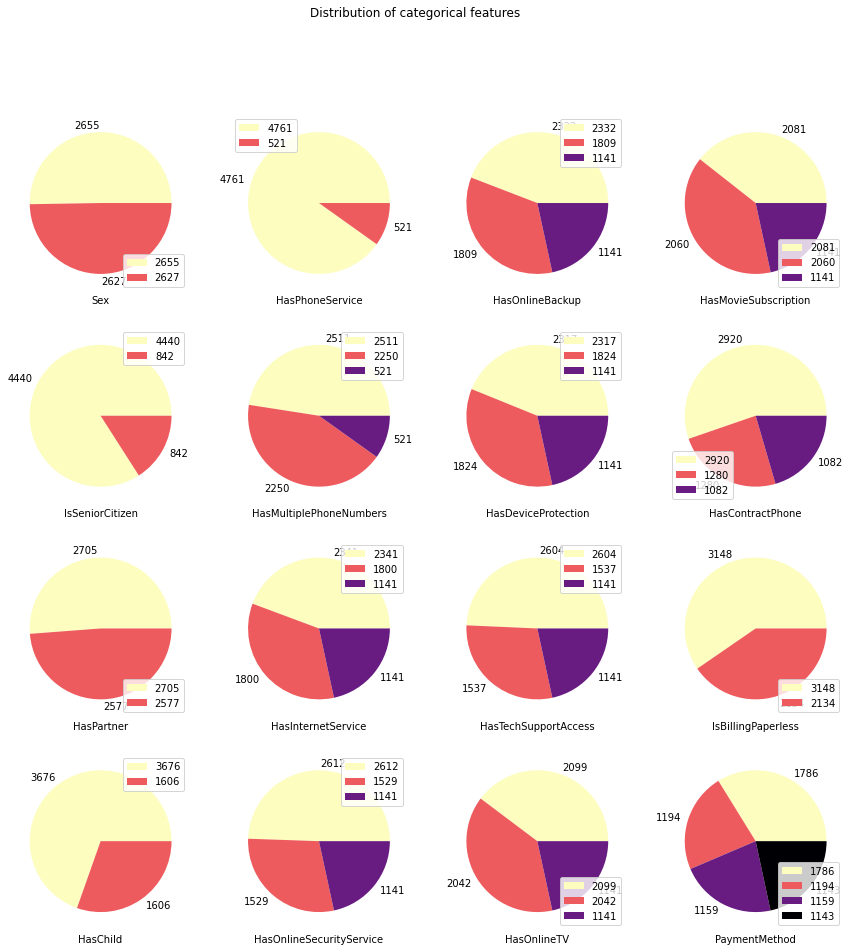

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
fig.suptitle('Distribution of categorical features')

colors = get_cmap(16)
for index, axis in enumerate(cat_cols):
    row, col = index%4, index//4
    axes[row, col].set_prop_cycle("color", plt.cm.magma_r(np.linspace(0,10,30)))
    axes[row, col].pie(data_train[cat_cols[index]].value_counts(), labels = data_train[axis].value_counts())
    axes[row, col].set_xlabel(cat_cols[index])
    axes[row, col].legend()

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

<Axes: >

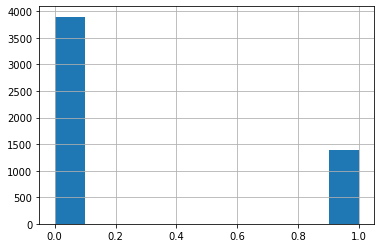

In [13]:
data_train[target_col].hist()

In [14]:
target_rate = data_train[data_train.Churn == 1].shape[0]/data_train.shape[0]
target_rate

0.26202196137826583

Классы не являются несбалансированными (разница не слишком велика).

# Logistic Regression
1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer

In [16]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

logreg_transformer = ColumnTransformer(transformers=[
                                ('num', StandardScaler(), num_cols),
                                ('cat_OH', OneHotEncoder(), cat_cols)
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

pipeline = make_pipeline(logreg_transformer, LogisticRegression(n_jobs=-1))
param_grid = {
   'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
   'logisticregression__penalty': ['l1', 'l2'],
   'logisticregression__max_iter' : [100, 300, 500, 1000],
   'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
 ColumnTransformer(transformers=[('num',
 StandardScaler(),
 ['ClientPeriod',
 'MonthlySpending',
 'TotalSpent']),
 ('cat_OH',
 OneHotEncoder(),
 ['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',...
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod'])])),
 ('logisticregression',
 LogisticRegression(n_jobs=-1))]),
 param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
 0.001],
 'logisticregression__max_iter': [100, 300, 500, 1000],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__solver': ['newton-cg', 'lbfgs',
 'liblinear', 'sag',
 'saga']},
 scoring='roc_auc') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
 ColumnTransformer(transformers=[('num',
 StandardScaler(),
 ['ClientPeriod',
 'MonthlySpending',
 'TotalSpent']),
 ('cat_OH',
 OneHotEncoder(),
 ['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',...
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod'])])),
 ('logisticregression',
 LogisticRegression(n_jobs=-1))]),
 param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
 0.001],
 'logisticregression__max_iter': [100, 300, 500, 1000],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__solver': ['newton-cg', 'lbfgs',
 'liblinear', 'sag',
 'saga']},
 scoring='roc_auc') estimator: Pipeline Pipeline(steps=[('columntransformer',
 ColumnTransformer(transformers=[('num', StandardScaler(),
 ['ClientPeriod',
 'MonthlySpending',
 'TotalSpent']),
 ('cat_OH', OneHotEncoder(),
 ['Sex', 'IsSeniorCitizen',
 'HasPartner', 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod'])])),
 ('logisticregression', LogisticRegression(n_jobs=-1))]) columntransformer: ColumnTransformer ColumnTransformer(transformers=[('num', StandardScaler(),
 ['ClientPeriod', 'MonthlySpending',
 'TotalSpent']),
 ('cat_OH', OneHotEncoder(),
 ['Sex', 'IsSeniorCitizen', 'HasPartner',
 'HasChild', 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService', 'HasOnlineBackup',
 'HasDeviceProtection', 'HasTechSupportAccess',
 'HasOnlineTV', 'HasMovieSubscription',
 'HasContractPhone', 'IsBillingPaperless',
 'PaymentMethod'])]) num ['ClientPeriod', 'MonthlySpending', 'TotalSpent'] StandardScaler StandardScaler() cat_OH ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'] OneHotEncoder OneHotEncoder() LogisticRegression LogisticRegression(n_jobs=-1)

In [26]:
grid.best_params_

{'logisticregression__C': 100,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

Выше при помощи GridSearchCV были выбраны лучшие параметры:

In [27]:
pipeline = make_pipeline(
                         logreg_transformer, 
                         LogisticRegression(**{'C' : 100, 'max_iter' : 500, 'solver' : 'saga', 'penalty': 'l1'})
)
pipeline.fit(X_train, y_train)
probs = pipeline.predict_proba(X_valid)[:, 1]

In [28]:
print('Best ROC-AUC score -', str(roc_auc_score(y_valid, probs)))
print('Params:')
for i in {'C' : 100, 'max_iter' : 500, 'solver' : 'saga', 'penalty': 'l1'}.items():
    print(i[0], ": ", i[1])

Best ROC-AUC score - 0.8487611968744044
Params:
C :  100
max_iter :  500
solver :  saga
penalty :  l1


Лучший результат метрики: 0.84876.

# Gradient Boosting

In [29]:
!pip install catboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [31]:
from catboost import CatBoostClassifier, Pool

## Default settings

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

train_dataset = Pool(X_train, y_train, cat_cols)
val_dataset = Pool(X_valid, y_valid, cat_cols)

cat_default = CatBoostClassifier(logging_level='Silent', eval_metric='AUC:hints=skip_train~false')
cat_default.fit(train_dataset, use_best_model=True, eval_set=val_dataset)

print(f'ROC-AUC score - {roc_auc_score(y_valid, cat_default.predict_proba(val_dataset)[:, 1])}')

ROC-AUC score - 0.8503084512799064


## CatBoost with parameters 

2) Протестируйте разные значения параметра количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

In [33]:
param_grid = {
    'depth': [2, 3, 4],
    'learning_rate': [0.02, 0.03, 0.04],
    'iterations' : [100, 300, 500, 800],
    }
base_params = {
    'logging_level':'Silent',
    'loss_function':'Logloss',
    'l2_leaf_reg': 3,
    'random_strength': 1.2,
    'eval_metric': 'AUC:hints=skip_train~false', 
}
cat_param = CatBoostClassifier(**base_params)
search = cat_param.grid_search(param_grid, train_dataset, cv=5)
cat_param.fit(train_dataset, use_best_model=True, eval_set=val_dataset)
print(search['params'])
print(f'Best ROC-AUC score - {roc_auc_score(y_valid, cat_param.predict_proba(val_dataset)[:, 1])}')

0:	loss: 0.8399139	best: 0.8399139 (0)	total: 399ms	remaining: 14s
1:	loss: 0.8462164	best: 0.8462164 (1)	total: 730ms	remaining: 12.4s
2:	loss: 0.8496636	best: 0.8496636 (2)	total: 1.06s	remaining: 11.7s
3:	loss: 0.8495840	best: 0.8496636 (2)	total: 2.21s	remaining: 17.7s
4:	loss: 0.8516018	best: 0.8516018 (4)	total: 3.38s	remaining: 21s
5:	loss: 0.8497293	best: 0.8516018 (4)	total: 4.57s	remaining: 22.8s
6:	loss: 0.8508473	best: 0.8516018 (4)	total: 6.52s	remaining: 27s
7:	loss: 0.8516433	best: 0.8516433 (7)	total: 8.51s	remaining: 29.8s
8:	loss: 0.8497293	best: 0.8516433 (7)	total: 10.5s	remaining: 31.6s
9:	loss: 0.8509338	best: 0.8516433 (7)	total: 14s	remaining: 36.5s
10:	loss: 0.8516433	best: 0.8516433 (7)	total: 18.6s	remaining: 42.2s
11:	loss: 0.8497293	best: 0.8516433 (7)	total: 36.9s	remaining: 1m 13s
12:	loss: 0.8453650	best: 0.8516433 (7)	total: 43.4s	remaining: 1m 16s
13:	loss: 0.8492310	best: 0.8516433 (7)	total: 48.7s	remaining: 1m 16s
14:	loss: 0.8515256	best: 0.8516433

{'depth': 2, 'learning_rate': 0.03, 'iterations': 500}
Best ROC-AUC score - 0.8526539167134018

# Predictions

Лучшей моделью оказалась CatBoost с параметрами.

In [34]:
best_model = cat_param

In [35]:
data_test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

data_test["TotalSpent"] = data_test["TotalSpent"].apply(pd.to_numeric,errors='coerce')
data_test["TotalSpent"] = data_test["TotalSpent"].astype('float64')
data_test['TotalSpent'].fillna(value=data_test['TotalSpent'].mean(), inplace=True)

submission['Churn'] = best_model.predict_proba(data_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission.head(5)

,Id,Churn
0,0,0.044783
1,1,0.657283
2,2,0.683150
3,3,0.014643
4,4,0.006278


# Kaggle
Дарья Рузанова, score: 0.85036